# Summer of Code - Artificial Intelligence

## Week 06: Linear Regression

### Day 01: Multivariate Linear Regression

In this notebook, we will explore multivariate linear regression.


# Multivariate Linear Regression

**Multivariate Linear Regression** uses multiple features to predict a target.

## Mathematical Formulation
Let's say we have a dataset with $m$ examples/observations and each observation has $n$ features:
- This dataset can be represented as $m \times n$ feature matrix, denoted by $X$.
- Each of these features is associated with its own weight $w_i$ where $i$ represents the $i^\text{th}$ feature.
- Additionally, we also have a bias parameter. So the total number of parameters are $n + 1$.
- These parameters are stored in a column vector $\theta$ of size $(n + 1) \times 1$.
- To make matrix multiplication possible, we add a column of ones as the first column to the feature matrix $X$.
### Matrix Notation:
$$
X = 
\begin{bmatrix}
    1 & x_1^{(1)} & x_2^{(1)} & \cdots & x_n^{(1)} \\
    1 & x_1^{(2)} & x_2^{(2)} & \cdots & x_n^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_1^{(m)} & x_2^{(m)} & \cdots & x_n^{(m)}
\end{bmatrix}
\qquad \text{size: } m \times (n + 1)
$$

$$
\theta = 
\begin{bmatrix}
    w_0 \\
    w_1 \\
    w_2 \\
    \vdots \\
    w_n
\end{bmatrix}
\qquad \text{size: } (n + 1) \times 1
$$

$$
y = h(X) =
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_m
\end{bmatrix}
\qquad \text{size: } m \times 1
$$




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# California Housing Dataset that we cleaned
df = pd.read_csv("../../datasets/california_house_prices/housing_cleaned.csv")

print("California Housing Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns)}")

df.head()

California Housing Dataset loaded successfully!
Dataset shape: (20640, 16)
Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN']


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,1.0,0.0


## Input Data and Target Variable
As we said that the input data is represented as a feature matrix $X$ of size $m \times (n + 1)$. The target variable is represented as a column vector $y$ of size $m \times 1$.

In [3]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

print(f"X shape: {X.shape}") # Currently not having the bias column
print(f"y shape: {y.shape}") # Currently not a column vector


X.head()

X shape: (20640, 15)
y shape: (20640,)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0.0,0.0,1.0,0.0


In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Reshape y to be a column vector, important for matrix operations later
y_train, y_test = y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")
print(f"Training features shape: {X_train.shape}")
print(f"Training target shape: {y_train.shape}")

Training set size: 16512 samples
Testing set size: 4128 samples
Training features shape: (16512, 15)
Training target shape: (16512, 1)


In [7]:
# Feature scaling (important for multivariate linear regression)
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # we fit on training data
X_test_scaled = scaler.transform(X_test) # we transform on test data using the same scaler

print("Scaling Statistics:")
print(f"Before scaling - Training data mean: {X_train.mean().mean():.2f}") # since X_train is a DataFrame, we take mean of means
print(f"Before scaling - Training data std: {X_train.std().mean():.2f}")
print(f"After scaling - Training data mean: {X_train_scaled.mean():.2f}") # X_train_scaled is a numpy array, so we take mean directly
print(f"After scaling - Training data std: {X_train_scaled.std():.2f}")

Scaling Statistics:
Before scaling - Training data mean: 337.65
Before scaling - Training data std: 276.37
After scaling - Training data mean: 0.00
After scaling - Training data std: 1.00


In [9]:
# Prepare Data for Multivariate Linear Regression
def add_bias_column(X):
    """Add bias column"""
    m = len(X)
    return np.column_stack([np.ones(m), X])


X_train = add_bias_column(X_train_scaled)
X_test = add_bias_column(X_test_scaled)

print(f"X_train shape after adding bias column: {X_train.shape}")

X_train shape after adding bias column: (16512, 16)


### Hypothesis Function
$$
h(x) = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
$$

This can be represented in matrix vector multiplication, where our feature matrix is $X$ and parameter vector is $\theta$.

$$
\hat{y} = h(X) = X\theta
$$
where $\hat{y}$ is the predicted target variable.

In [11]:
def model(X, theta):
    return X @ theta

### Cost Function
The cost function is the Mean Squared Error (MSE) between the predicted values and actual target values. Basically, it measures how well our model is performing. Quantitatively, it measures the average difference between the predicted values and the actual target values.

If we have predicted values as $\hat{y}$ (shape: $(m, 1)$) and actual target values as $y$ (shape: $(m, 1)$), then the cost function $J(\theta)$ can be calculated as:
$$
J(\theta) = \frac{1}{2m} (\hat{y} - y)^T (\hat{y} - y)
$$


In [23]:
def cost_function(pred, actual):
    m = len(actual)
    cost = (1 / (2 * m)) * (pred - actual).T @ (pred - actual)
    return cost[0, 0] # return as scalar

### Gradient
The gradient gives the direction and rate of fastest increase of the cost function. It is a vector of partial derivatives of the cost function with respect to each parameter in $\theta$.
$$
\nabla J(\theta) = \frac{1}{m}X^T(\hat{y} - y)
$$


In [16]:
def compute_gradients(X, pred, actual):
    m = len(actual)
    return (1 / m) * X.T @ (pred - actual)


### Parameter Update
Once we have the gradient, we can update our parameters using gradient descent. Intuitively, we want to move our parameters in the direction that reduces the cost function. This is done by subtracting a fraction of the gradient from the current parameters. The fraction is determined by the learning rate $\alpha$.
$$
\theta = \theta - \alpha \nabla J(\theta)
$$


In [18]:
def update_parameters(theta, gradients, lr=0.001):
    new_theta = theta - lr * gradients # theta is vector of parameters
    return new_theta

### Gradient Descent Algorithm
1. Initialize parameters $\theta$ (weights and bias) randomly or with zeros.
2. For a fixed number of iterations or until cost reduces below a threshold:
   - Compute the predicted values $\hat{y} = X\theta$.
   - Calculate the cost $J(\theta)$ using the cost function.
   - Compute the gradient $\nabla J(\theta)$.
   - Update the parameters $\theta = \theta - \alpha \nabla J(\theta)$.


In [26]:
def gradient_descent(X, y, lr=0.01, iterations=100):
    print(f"Starting Multivariate Gradient Descent...")
    print(f"Learning rate: {lr}")
    print(f"Number of iterations: {iterations}")
    print(f"Training examples: {len(X)}")
    print(f"Features: {X.shape[1]}")
    print("-" * 50)

    # randomly initialize model parameters
    theta = np.random.normal(0, 0.01, (X.shape[1], 1))

    cost_history = []

    for i in range(iterations):
        pred = model(X, theta)
        cost = cost_function(pred, y)
        gradients = compute_gradients(X, pred, y)
        theta = update_parameters(theta, gradients, lr)

        cost_history.append(cost)

        if (i+1) % 100 == 0:
            print(f"Iteration: {i + 1}, cost: {cost:.6f}")

    return theta, cost_history

In [27]:
final_theta, cost_history = gradient_descent(X_train, y_train, lr=0.001, iterations=5000)

Starting Multivariate Gradient Descent...
Learning rate: 0.001
Number of iterations: 5000
Training examples: 16512
Features: 16
--------------------------------------------------
Iteration: 100, cost: 23268903920.820900
Iteration: 200, cost: 19328800584.457031
Iteration: 300, cost: 16170980016.752285
Iteration: 400, cost: 13631768904.941401
Iteration: 500, cost: 11584035524.620453
Iteration: 600, cost: 9928337727.326811
Iteration: 700, cost: 8586437253.620808
Iteration: 800, cost: 7496472375.061441
Iteration: 900, cost: 6609319892.194637
Iteration: 1000, cost: 5885825643.590186
Iteration: 1100, cost: 5294678331.651074
Iteration: 1200, cost: 4810765401.465755
Iteration: 1300, cost: 4413893641.184935
Iteration: 1400, cost: 4087788031.452285
Iteration: 1500, cost: 3819304427.001274
Iteration: 1600, cost: 3597807639.043260
Iteration: 1700, cost: 3414678208.205741
Iteration: 1800, cost: 3262919837.896739
Iteration: 1900, cost: 3136845942.655228
Iteration: 2000, cost: 3031828649.125857
Itera

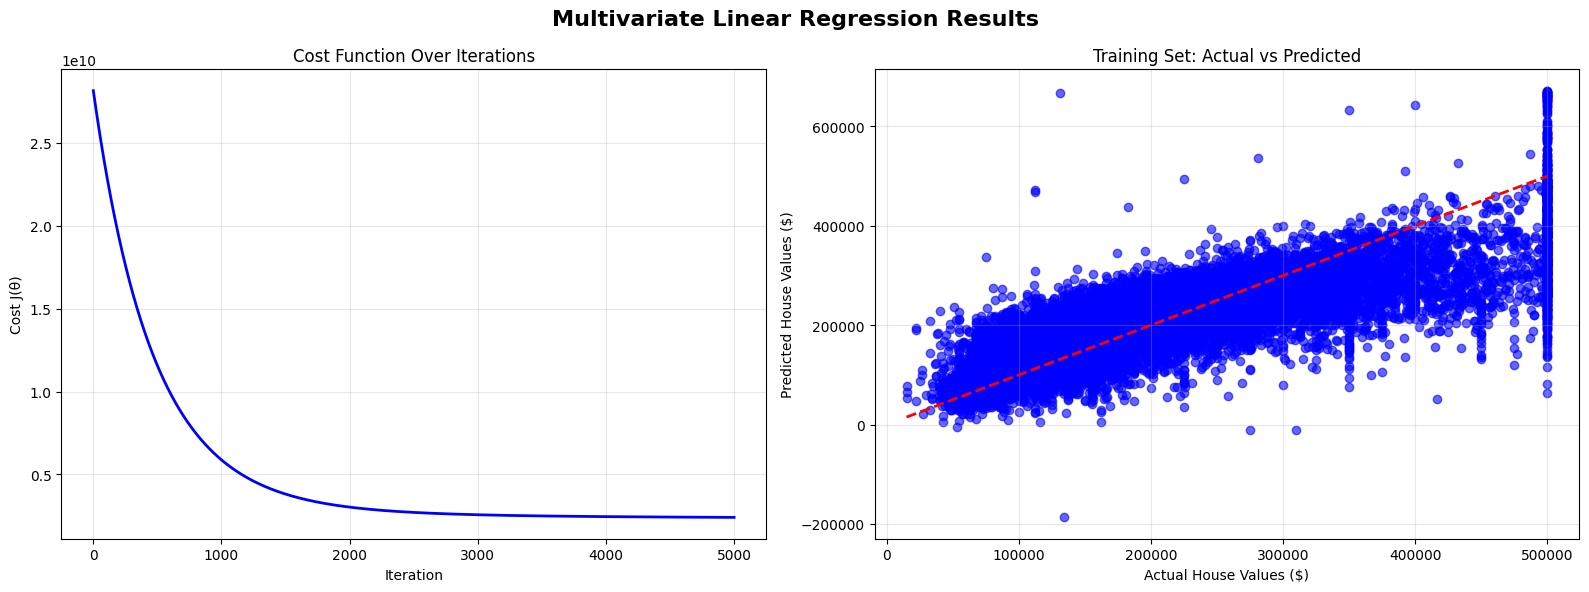

In [28]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Multivariate Linear Regression Results", fontsize=16, fontweight="bold")

# Plot 1: Cost function over iterations
axes[0].plot(cost_history, "b-", linewidth=2)
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Cost J(θ)")
axes[0].set_title("Cost Function Over Iterations")
axes[0].grid(True, alpha=0.3)

# Plot 3: Actual vs Predicted (Training)
train_predictions = model(X_train, final_theta)
axes[1].scatter(y_train, train_predictions, alpha=0.6, color="blue")
axes[1].plot(
    [y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=2
)
axes[1].set_xlabel("Actual House Values ($)")
axes[1].set_ylabel("Predicted House Values ($)")
axes[1].set_title("Training Set: Actual vs Predicted")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Measuring Performance on Test Set

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(X, y, theta):
    pred = model(X, theta)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

In [31]:
print("Evaluating on Training Set:")
evaluate_model(X_train, y_train, final_theta)

Evaluating on Training Set:
Mean Squared Error: 4825101453.598682
R^2 Score: 0.6390499627354231


In [ ]:
print("Evaluating on Test Set:")
evaluate_model(X_test, y_test, final_theta)

Evaluating on Test Set:
Mean Squared Error: 5186387217.718993
R^2 Score: 0.604216141385018
